# Exploration des relevés de données des bâtiments 

## Sommaire

* [1 - Traitement des données](#chapter1)
    * [1.1. Traitement des données de 2015](#section_1_1)
    * [1.2. Traitement des données de 2016](#Section_1_2)
    * [1.3. Création d'un dataset unique](#section_1_3)
        * [Traitement du dataset crée](#section_1_3_1)
        * [Suppression des données aberrantes](#section_1_3_2)
        * [Normalisation des modalités](#section_1_3_3)
    * [1.4. Création de nouvelles variables/Feature Engineering](#section_1_4)
    * [1.5. Visualisation du dataset crée](#section_1_5)
 
    
    
* [2 - Analyses descriptives](#chapter2)
    * [2.1. Données géographiques](#section_2_1)
    * [2.2. Analyses univariées](#section_2_2)
    * [2.3. Analyses bivariées](#section_2_3)
    


* [3 - Références bibliographiques](#chapter3)

In [1]:
# importation des librairies nécessaires à l'exploration
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt

import seaborn as sns
import pingouin as pg

## 1 - Traitement des données <a class="anchor" id="chapter1"></a>

On va commencer par analyser les jeux de données de manière isolée avant de les regrouper en un seul dataset. On commence donc le chargement des données de 2015 et par regarder la manière dont elles sont présentées. 

### 1.1) Traitement des données de 2015 <a class="anchor" id="section_1_1"></a>

In [2]:
# Chargement du fichier de 2015
filepath_2015 = 'datasets/2015-building-energy-benchmarking.csv'
df_2015 = pd.read_csv(filepath_2015)
df_2015.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081


In [3]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

Les chaînes de caractères sont écrites en majuscule, on va donc les passer en minuscule avec la première lettre en majuscule. On va aussi s'intéresser aux valeurs manquantes. 

In [4]:
# Passage des chaînes de caractères en minuscule
df_2015['PropertyName'] = df_2015["PropertyName"].str.capitalize()
df_2015['Neighborhood'] = df_2015["Neighborhood"].str.capitalize()

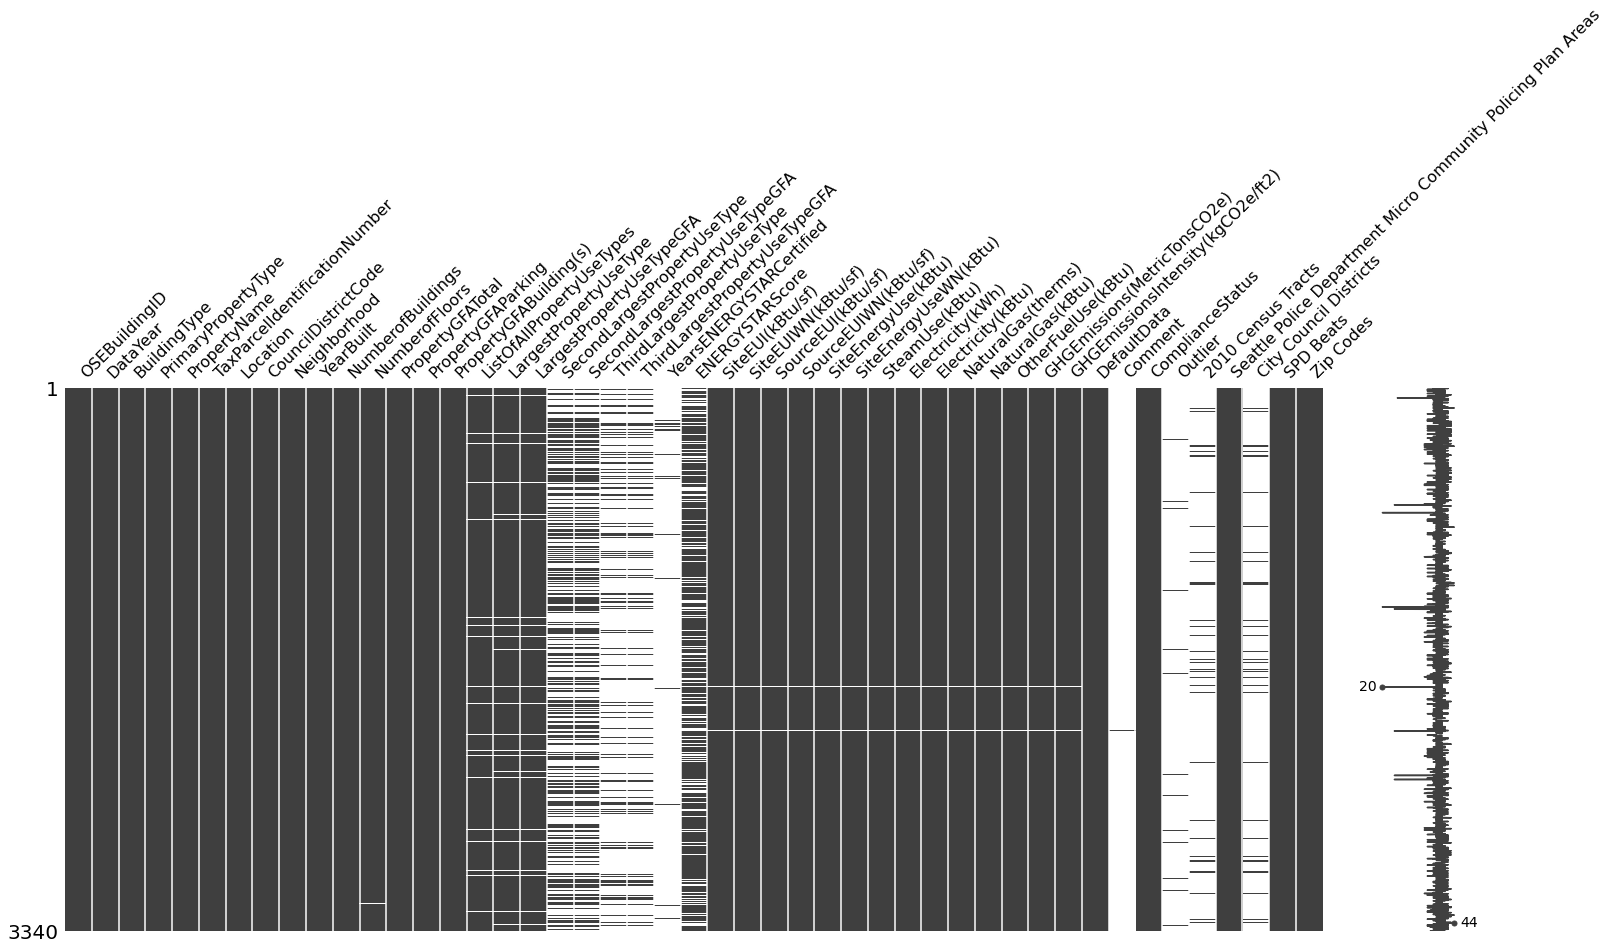

In [5]:
msno.matrix(df_2015);

In [6]:
# Suppression des colonnes avec plus de 95% de valeurs manquantes
df_2015 = df_2015.loc[:, df_2015.isnull().mean() <.95]

In [7]:
# Harmonisation des noms de colonnes avec le dataset de 2016
df_2015.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions",
                        "GHGEmissionsIntensity(kgCO2e/ft2)" : "GHGEmissionsIntensity",
                        "Zip Codes" : "ZipCode"}, inplace=True)

### 1.2) Traitement des données de 2016 <a class="anchor" id="section_1_2"></a>

Les données de 2016 sont traitées de la même manière que celle de 2015 pour permettre de pouvoir réunir les deux datasets ensemble. Les colonnes supprimées pour le dataset de 2015 ont été supprimés pour celui de 2016. 

In [8]:
# Chargement du fichier de 2016
filepath_2016 = 'datasets/2016-building-energy-benchmarking.csv'
df_2016 = pd.read_csv(filepath_2016)
df_2016.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19


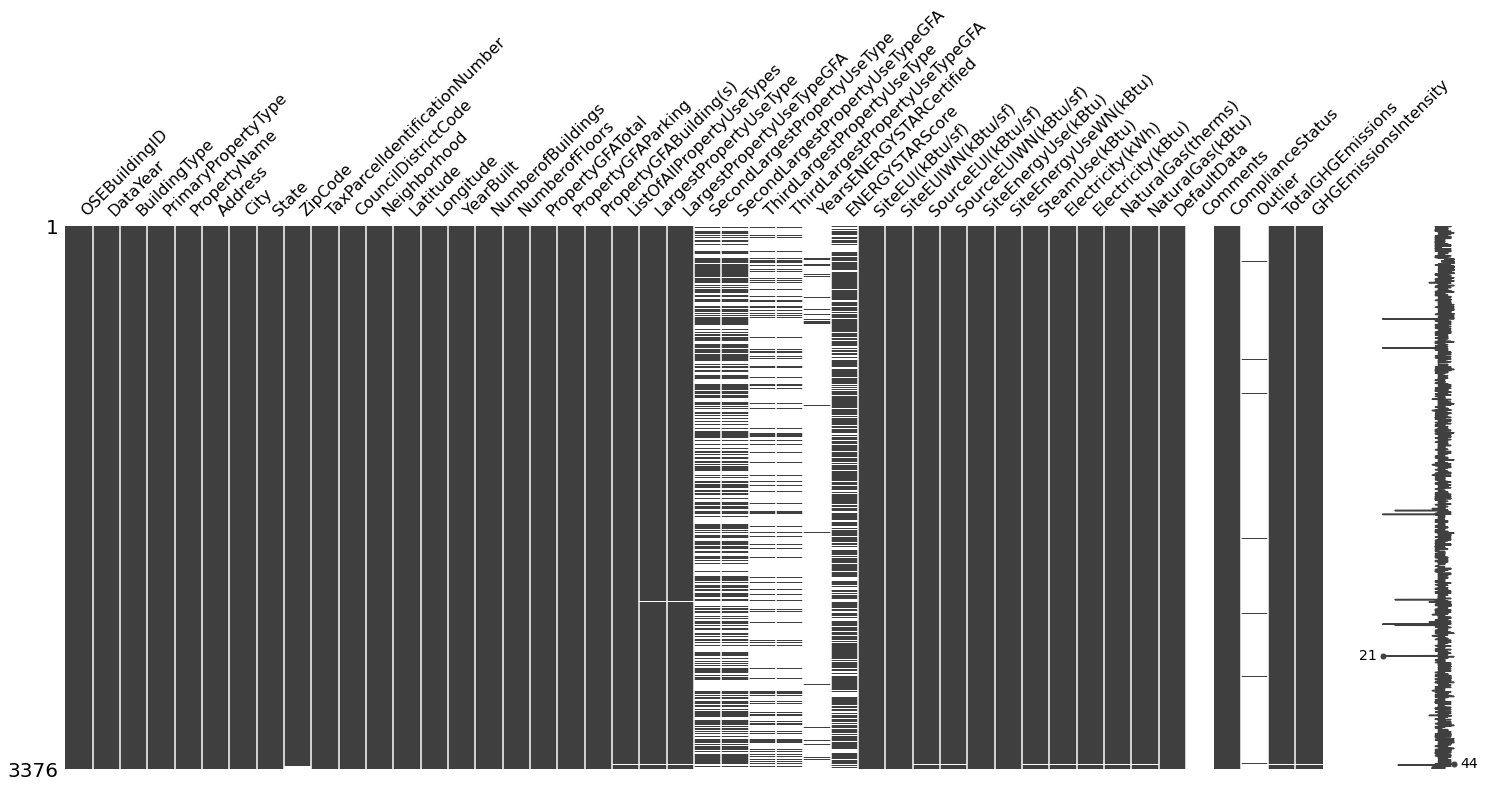

In [9]:
msno.matrix(df_2016);

In [10]:
df_2016['PropertyName'] = df_2016["PropertyName"].str.capitalize()
df_2016['Neighborhood'] = df_2016["Neighborhood"].str.capitalize()

In [11]:
df_2016 = df_2016.loc[:, df_2016.isnull().mean() <.95]

In [12]:
# Création d'un dataframe pour ajouter les latitudes et longitudes des bâtiments en fonction de leur ID
coord = df_2016[["OSEBuildingID", "Latitude", "Longitude"]]
df_2015 = df_2015.merge(coord, on="OSEBuildingID")

### 1.3) Création d'un dataset avec les données de 2015 & 2016 <a class="anchor" id="section_1_3"></a>

On effectue une jointure entre nos deux datasets pour n'en créer qu'un seul. 

In [13]:
# Jointure entre le dataset de 2015 et de 2016
df = pd.concat([df_2015,df_2016], join="outer", ignore_index=True, verify_integrity=True)
df.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,ZipCode,Latitude,Longitude,Address,City,State
0,1,2015,NonResidential,Hotel,Mayflower park hotel,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,Downtown,1927,...,NaN,14.0,NaN,31.0,18081.0,47.61220,-122.33799,NaN,NaN,NaN
1,2,2015,NonResidential,Hotel,Paramount hotel,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,Downtown,1996,...,NaN,14.0,NaN,31.0,18081.0,47.61317,-122.33393,NaN,NaN,NaN
2,3,2015,NonResidential,Hotel,Westin hotel,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,Downtown,1969,...,NaN,56.0,NaN,31.0,18081.0,47.61393,-122.33810,NaN,NaN,NaN


#### 1.3.1) Traitement du dataset crée <a class="anchor" id="section_1_3_1"></a>

Certaines chaînes de caractères ne sont pas normalisées et contiennent des différences, on va donc harmoniser ces chaînes de caractères pour éviter d'avoir deux catégories pour la même modalité. 

In [14]:
# Harmonisation des chaînes de caractères
char_correction = {"Distribution Center\n" : "Distribution Center",
                   "Self-Storage Facility\n" : "Self-Storage Facility",
                   "Restaurant\n" : "Restaurant",
                   "Supermarket / Grocery Store": "Supermarket/Grocery Store",
                   "Residence Hall/Dormitory" : "Residence Hall"}

for key, value in char_correction.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

In [15]:
neighborhood_correction = {"Delridge neighborhoods": "Delridge"}

for key, value in neighborhood_correction.items():
    df["Neighborhood"].loc[df["Neighborhood"].str.contains(key, case=False, regex=False)] = value

L'observation des différentes modalités du type de propriétés primaires, montre qu'il reste des bâtiments à caractère résidentiel. On supprime donc ces entrées pour ne conserver que les bâtiments non-résidentiels.

#### 1.3.2) Suppression des données aberrantes <a class="anchor" id="section_1_3_2"></a>

On va regarder s'il n'y a pas des valeurs négatives dans le dataset crée.

In [16]:
df.loc[df['Electricity(kBtu)'] < 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,ZipCode,Latitude,Longitude,Address,City,State
6490,49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt center,7234600195,NaN,3,Central,2013,...,NaN,NaN,NaN,NaN,98122.0,47.61432,-122.31257,1501 E. Madison St.,Seattle,WA


Après recherche, cette entrée ne correspond pas à une erreur mais d'un bâtiment à énergie positive. Il s'agit bien d'un bâtiment non-résidentiel qui héberge des bureaux. Cet immeuble possède des panneaux solaires pour s'alimenter en électricité et aussi produire de l'électricité verte qui pourra être acheminé à des bâtiments de la ville. Il possède aussi des puits de géothermie, est construit avec des matériaux respectueux de l'environnement et a une orientation qui lui permet de profiter de 82% d'ensoleillement. 


Pour plus d'informations : [Site du bullit center](!https://bullittcenter.org/).

Par précaution, on supprime donc toutes les valeurs énergétiques qui sont inférieures à 0 pour ne pas perturber la suite de l'analyse et la création du modèle. On supprime aussi les entrées où la superficie totale est négative. 

In [17]:
df = df.loc[df['Electricity(kBtu)'] > 0]
df = df.loc[df["TotalGHGEmissions"] > 0]
df = df.loc[df["GHGEmissionsIntensity"] > 0]
df = df.loc[df["PropertyGFATotal"] > 0]
df = df.loc[df["SiteEnergyUse(kBtu)"] > 0]

On observe qu'un bâtiment consomme plus d'énergie que les autres. Il s'agit du campus de l'université de Washington. Les données pour cet établissement n'étaient disponibles que pour une seule année. On va enlever cette entrée par précaution. 

In [18]:
# Retrait de l'université de Washington
df = df.loc[df["SiteEnergyUse(kBtu)"] != df["SiteEnergyUse(kBtu)"].max()]

Un autre bâtiment dégage plus de CO2 que la moyenne. Il s'agit d'un campus industriel où se situe l'usine Boeing. Etant donné que les données obtenues ne sont disponibles que pour une seule année, on ne va pas pouvoir faire une vérification sur une autre année pour voir si cette donnée est normale. On va donc la supprimer de notre jeu de données. 

In [19]:
# Retrait du campus Boeing
df = df.loc[df["TotalGHGEmissions"] != df["TotalGHGEmissions"].max()]

On finit par supprimer les informations non utilisées et/ou redondantes de notre dataset.

In [20]:
# Suppression des colonnes redondantes et non utilisées dans la suite
df.drop(["PropertyName","LargestPropertyUseTypeGFA", "SiteEUI(kBtu/sf)", "SourceEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)",
         "SiteEnergyUseWN(kBtu)", "Electricity(kWh)", "NaturalGas(therms)", "TaxParcelIdentificationNumber","Location","CouncilDistrictCode",
         "ListOfAllPropertyUseTypes", "LargestPropertyUseType",
         "DefaultData", "ComplianceStatus", "State", 
         "Seattle Police Department Micro Community Policing Plan Areas","SPD Beats", "ZipCode"], axis=1, inplace=True)

In [21]:
df.shape

(6607, 30)

#### 1.3.3) Harmonisation des modalités <a class="anchor" id="section_1_3_3"></a>

Certains bâtiments ont la même vocation mais ont des appelations différentes. On va les regrouper sous le même nom. 

In [22]:
# Regroupement des établissements scolaires dans une catégorie unique
property_use = {"College/University" : "University",
                "SPS-District K-12" : "K-12 School"}

for key, value in property_use.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

In [23]:
# Regroupement de certains types de  bâtiments dans des catégories uniques
property_type = {"Small- and Mid-Sized Office" : "Office",
                 "Large Office" : "Office", 
                 "Medical Office" : "Office",
                 "Refrigerated Warehouse" : "Warehouse",
                 "Non-Refrigerated Warehouse" : "Warehouse",
                 "Self-Storage Facility" : "Warehouse",
                 "Supermarket/Grocery" : "Supermarket/Store",
                 "Retail Store" : "Supermarket/Store"}

for key, value in property_type.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

Avant de regrouper des catégories pour les types d'usage secondaire et tertiaire des propriétés, on va remplacer les valeurs manquantes par la mention "N.C." (Not Concerned). En effet, lorsque la donnée n'est pas présente il ne s'agit pas d'une donnée manquante mais d'une propriété qui ne possède qu'un seul usage. Le raisonnement pour les surfaces a été le même. La valeur choisie sera -1 au lieu de N.C.

In [24]:
df["SecondLargestPropertyUseType"].fillna(value="N.C.", inplace=True)
df["ThirdLargestPropertyUseType"].fillna(value="N.C.", inplace=True)

In [25]:
property_type = {"Small- and Mid-Sized Office" : "Office",
                 "Large Office" : "Office", 
                 "Medical Office" : "Office",
                 "Refrigerated Warehouse" : "Warehouse",
                 "Non-Refrigerated Warehouse" : "Warehouse",
                 "Self-Storage Facility" : "Warehouse",
                 "Supermarket/Grocery" : "Supermarket/Store",
                 "Retail Store" : "Supermarket/Store",
                 "Residence Hall/Dormitory" : "Residence Hall"}

for key, value in property_type.items():
    df['SecondLargestPropertyUseType'].loc[df["SecondLargestPropertyUseType"].str.contains(key, case=False, regex=False)] = value

In [26]:
property_type = {"Small- and Mid-Sized Office" : "Office",
                 "Large Office" : "Office", 
                 "Medical Office" : "Office",
                 "Refrigerated Warehouse" : "Warehouse",
                 "Non-Refrigerated Warehouse" : "Warehouse",
                 "Self-Storage Facility" : "Warehouse",
                 "Supermarket/Grocery" : "Supermarket/Store",
                 "Retail Store" : "Supermarket/Store",
                 "Residence Hall/Dormitory" : "Residence Hall"}

for key, value in property_type.items():
    df['ThirdLargestPropertyUseType'].loc[df["ThirdLargestPropertyUseType"].str.contains(key, case=False, regex=False)] = value

In [27]:
df["SecondLargestPropertyUseTypeGFA"].fillna(value=-1, inplace=True)
df["ThirdLargestPropertyUseTypeGFA"].fillna(value=-1, inplace=True)

Avant de supprimer la variable "DataYear", correspondant à l'année d'acquision des données, on va s'intéresser à la variation de la consommation d'énergie et aux émissions de gaz à effets de serre entre 2015 et 2016.

In [28]:
energy_2015 = df["SiteEnergyUse(kBtu)"].loc[(df["DataYear"] == 2015)].mean()
energy_2016 = df["SiteEnergyUse(kBtu)"].loc[(df["DataYear"] == 2016)].mean()
diff_energy = energy_2016 - energy_2015

print("Consommation d'énergie en 2015: " + str(energy_2015) + " kBtu")
print("Consommation d'énergie en 2016: " + str(energy_2016) + " kBtu")
print("Différence de consommation entre 2015 et 2016: " + str(diff_energy) + " kBtu")

Consommation d'énergie en 2015: 4971997.359044995 kBtu
Consommation d'énergie en 2016: 5049383.004285981 kBtu
Différence de consommation entre 2015 et 2016: 77385.64524098579 kBtu


In [29]:
co2_2015 = df["TotalGHGEmissions"].loc[(df["DataYear"] == 2015)].mean()
co2_2016 = df["TotalGHGEmissions"].loc[(df["DataYear"] == 2016)].mean()
diff_co2 = co2_2016 - co2_2015


print("Emissions de CO2 en 2015: " + str(co2_2015) + " MetricTonsCO2e")
print("Emissions de CO2 en 2016: " + str(co2_2016) + " MetricTonsCO2e")
print("Différence de consommation entre 2015 et 2016: " + str(diff_co2) + " MetricTonsCO2e")

Emissions de CO2 en 2015: 109.34660238751127 MetricTonsCO2e
Emissions de CO2 en 2016: 111.88367365269451 MetricTonsCO2e
Différence de consommation entre 2015 et 2016: 2.5370712651832434 MetricTonsCO2e


**Conclusion :**
On remarque une faible augmentation de la consommation d'énergie entre 2015 et 2016 (environ 1%). Cette augmentation de 1% est aussi visible pour les émissions de CO2. Cependant, les conditions climatiques peuvent expliquer ces variations.

### 1.4) Création de nouvelles variables/Feature Engineering <a class="anchor" id="section_1_4"></a>

On ajoute une variable "Age" qui sera plus précise que l'année de construction. On va ensuite créer une variable catégorielle à partir des quartiles de l'âge des bâtiments.

In [30]:
df["Age"] = df["DataYear"] - df["YearBuilt"]

On ajoute une variable qui correspond aux "degree-days" (équivalent des Degrès Jour Unifié en France). Seule la valeur concernant les degree days Heating a été ajouté dans notre jeu de données. La valeur pour les degree days Cooling est inversement corrélée aux degree days Healing. 

Source : [Energystar](!https://portfoliomanager.energystar.gov/pm/degreeDaysCalculator)

In [31]:
def degreeDaysH(row):
    if row["DataYear"] == 2015:
        val = 4005
    else:
        val = 4093
    return val

df['degreeDaysH'] = df.apply(degreeDaysH, axis=1)

On crée une variable "Has a Parking".

In [32]:
def HasParking(row):
    if row["PropertyGFAParking"] <= 0:
        val="No"
    else:
        val="Yes"
    return val

df['HasParking'] = df.apply(HasParking, axis=1)

On va créer des clusters à partir des points de géolocalisation (latitude et longitude) pour créer des zones.

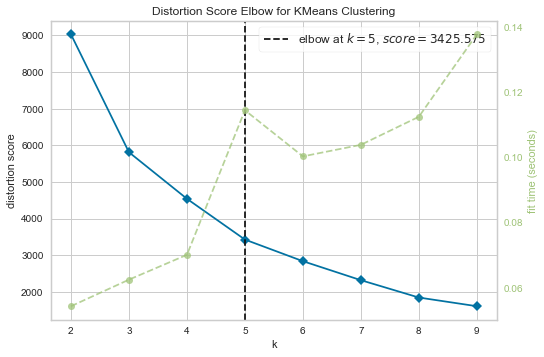

In [33]:
# Elbow method pour déterminer le nombre de clusters optimale
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

scaler = StandardScaler()
X = np.abs(df[["Latitude", "Longitude"]])
X_scaled = scaler.fit_transform(X)

model = KMeans()
visualizer = KElbowVisualizer(model, k =(2, 10))
visualizer.fit(X_scaled)
visualizer.show();

In [34]:
# Calcul du K-Means et affectation du cluster à chaque bâtiment
kmeans = KMeans(n_clusters=5)

kmeans.fit(X_scaled)
pred = kmeans.predict(X_scaled)

clusters = pd.DataFrame(pred, index=df["OSEBuildingID"]).reset_index()
clusters.columns = ["OSEBuildingID", "Clusters"]
df = pd.merge(df, clusters, on="OSEBuildingID")
df.drop_duplicates(inplace=True)
df.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,2010 Census Tracts,City Council Districts,Latitude,Longitude,Address,City,Age,degreeDaysH,HasParking,Clusters
0,1,2015,NonResidential,Hotel,Downtown,1927,1.0,12.0,88434,0,...,NaN,NaN,47.61220,-122.33799,NaN,NaN,88,4005,No,1
2,1,2016,NonResidential,Hotel,Downtown,1927,1.0,12.0,88434,0,...,NaN,NaN,47.61220,-122.33799,405 Olive way,Seattle,89,4093,No,1
4,2,2015,NonResidential,Hotel,Downtown,1996,1.0,11.0,103566,15064,...,NaN,NaN,47.61317,-122.33393,NaN,NaN,19,4005,Yes,1


In [35]:
# Paramétrage visuel
sns.set_theme(style="ticks", palette="Pastel2")

### 1.5) Visualisation du dataset obtenu <a class="anchor" id="section_1_5"></a>

In [36]:
# Suppression des colonnes non utilisées
df.drop(["OSEBuildingID", "Address", "DataYear", "BuildingType", "PropertyGFABuilding(s)", "PropertyGFAParking", "SourceEUIWN(kBtu/sf)", "SteamUse(kBtu)",
         "Electricity(kBtu)", "NaturalGas(kBtu)", "OtherFuelUse(kBtu)", "GHGEmissionsIntensity", "City", "2010 Census Tracts", "City Council Districts"], axis=1, inplace=True)

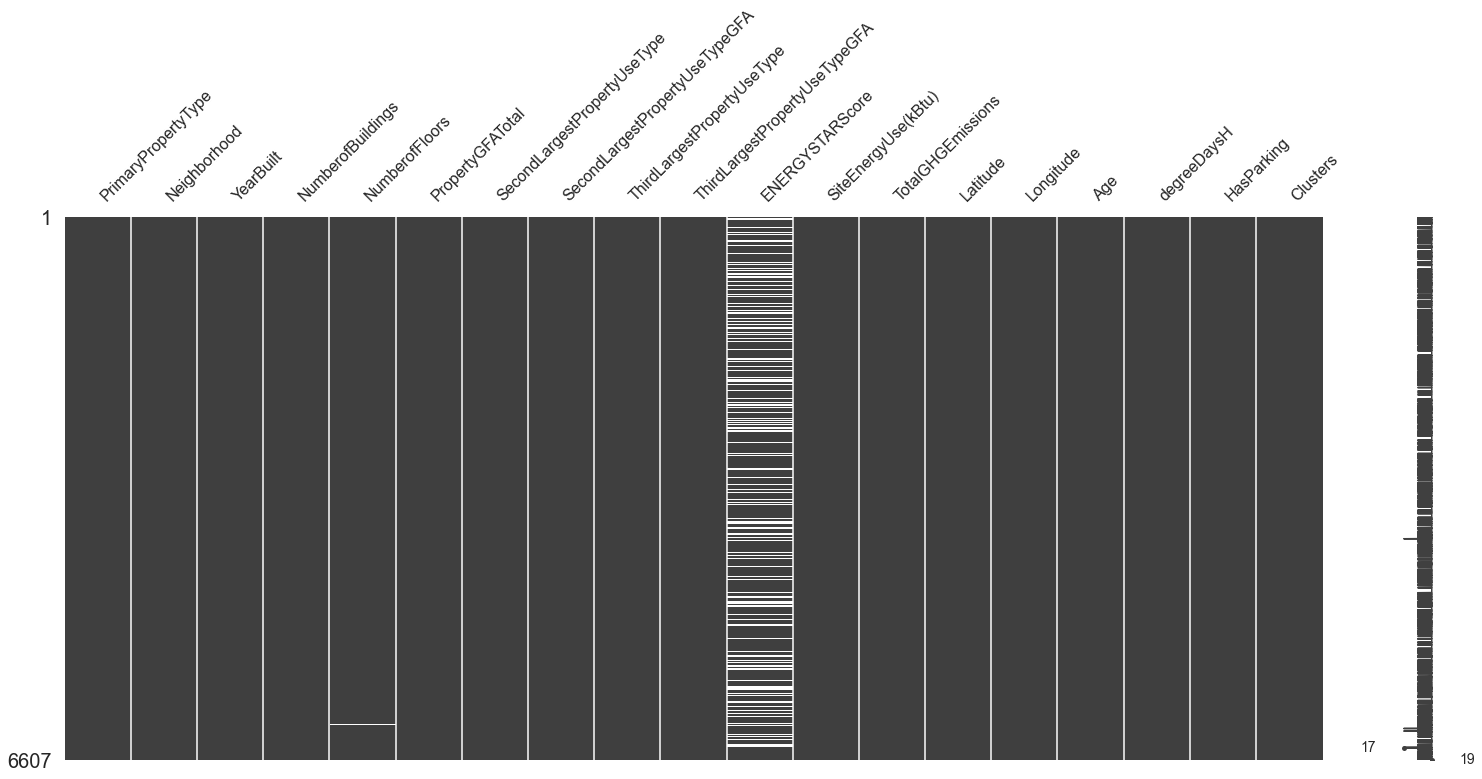

In [37]:
msno.matrix(df);

In [38]:
df.to_csv("datasets/benchmark_total.csv", index=False)

Maintenant que nos données ont été traités et nettoyés, on va sauvegarder ce dataset pour la création du modèle. Dans la suite de ce notebook, on va pouvoir faire l'analyse exploratoire de nos données. 

## 2 - Analyse exploratoire <a class="anchor" id="chapter2"></a>

In [39]:
df.shape

(6607, 19)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6607 entries, 0 to 13086
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PrimaryPropertyType              6607 non-null   object 
 1   Neighborhood                     6607 non-null   object 
 2   YearBuilt                        6607 non-null   int64  
 3   NumberofBuildings                6607 non-null   float64
 4   NumberofFloors                   6599 non-null   float64
 5   PropertyGFATotal                 6607 non-null   int64  
 6   SecondLargestPropertyUseType     6607 non-null   object 
 7   SecondLargestPropertyUseTypeGFA  6607 non-null   float64
 8   ThirdLargestPropertyUseType      6607 non-null   object 
 9   ThirdLargestPropertyUseTypeGFA   6607 non-null   float64
 10  ENERGYSTARScore                  5045 non-null   float64
 11  SiteEnergyUse(kBtu)              6607 non-null   float64
 12  TotalGHGEmissions  

###  2.1) Données géographiques <a class="anchor" id="section_2_1"></a>

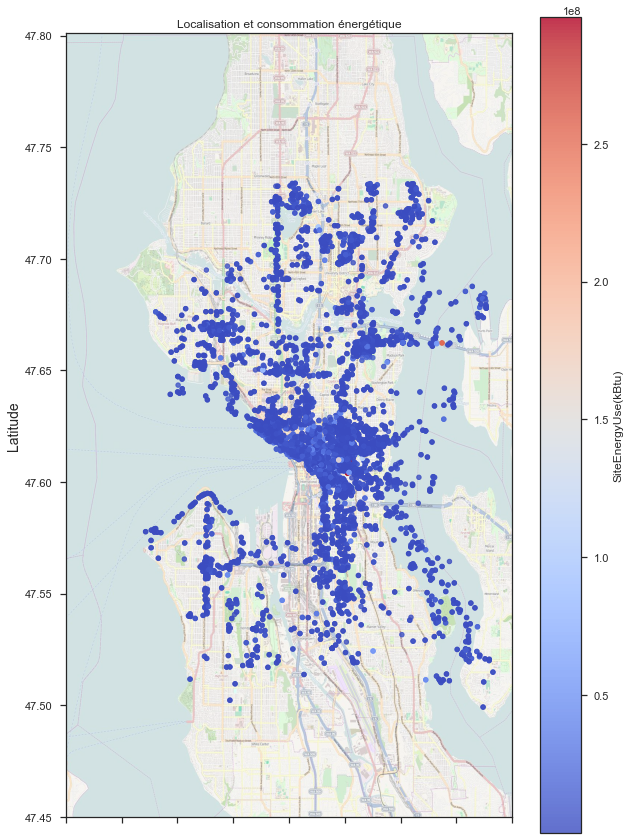

In [41]:
import matplotlib.image as mpimg
seattle_img=mpimg.imread('illustrations/Map_Seattle.jpg')
ax = df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,15),
        alpha = 0.8, c="SiteEnergyUse(kBtu)", colorbar=True, cmap=plt.get_cmap("coolwarm"))
plt.imshow(seattle_img, extent=[-122.45, -122.25, 47.45, 47.801], alpha=0.6)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Localisation et consommation énergétique")
plt.savefig("illustrations/Graphiques/Seattle_energy.png")

plt.show()

On observe une concentration de bâtiments non-résidentiels dans le centre-ville de Seattle. Cela s'explique par le fait que beaucoup de bâtiments non-résidentiels sont des bureaux. Les bâtiments qui se situent en dehors du centre-ville (ou Downtown) vont être des entrepôts, des campus ou encore des hôpitaux.

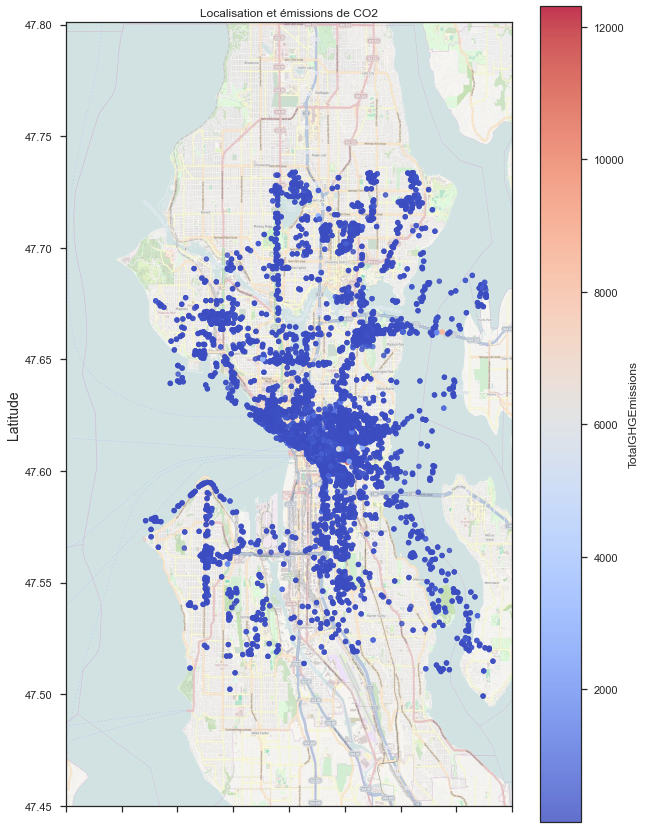

In [42]:
seattle_img=mpimg.imread('illustrations/Map_Seattle.jpg')
ax = df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,15),
        alpha = 0.8, c="TotalGHGEmissions", colorbar=True, cmap=plt.get_cmap("coolwarm"))
plt.imshow(seattle_img, extent=[-122.45, -122.25, 47.45, 47.801], alpha=0.6)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Localisation et émissions de CO2")
plt.savefig("illustrations/Graphiques/Seattle_co2.png")

plt.show()

La répartition des bâtiments est la même que pour la consommation d'énergie.

In [43]:
df["Clusters"] = df["Clusters"].astype("int64")

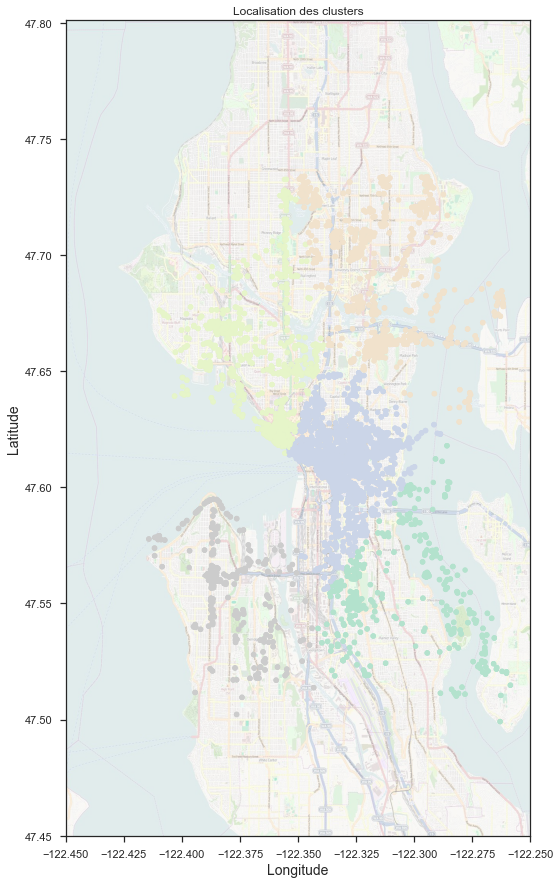

In [44]:
seattle_img=mpimg.imread('illustrations/Map_Seattle.jpg')
ax = df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,15),
        alpha = 1, c="Clusters", colorbar=False, cmap=plt.get_cmap("Pastel2"))
plt.imshow(seattle_img, extent=[-122.45, -122.25, 47.45, 47.801], alpha=0.4)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Localisation des clusters")
plt.savefig("illustrations/Graphiques/Seattle_clusters.png")

plt.show()

Le clustering effectué à l'aide de l'algorithme du K-Means et avec les coordonnées de géolocalisation des bâtiments a permis de créer 4 clusters. Cela permet d'avoir une autre distribution des bâtiments non-résidentiels sans avoir à respecter un découpage administratif. Ce clustering sera utilisé à la place des informations sur le quartier lors de la recherche d'un algorithme de prédiction. 

### 2.2) Analyses univariées <a class="anchor" id="section2_2"></a>

In [45]:
# Séparation des variables catégorielles et numériques
cat_var = ["PrimaryPropertyType", "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType", "Neighborhood", "HasParking",
           "NumberofBuildings", "NumberofFloors", "Clusters"]

num_var = ["YearBuilt","Age", "ENERGYSTARScore", "PropertyGFATotal", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA",
           "SiteEnergyUse(kBtu)", "TotalGHGEmissions"]

- Distribution des variables catégorielles

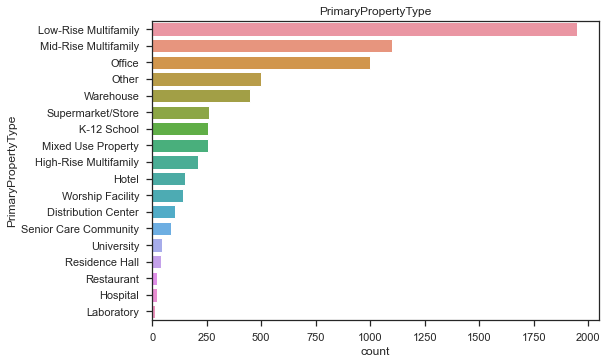

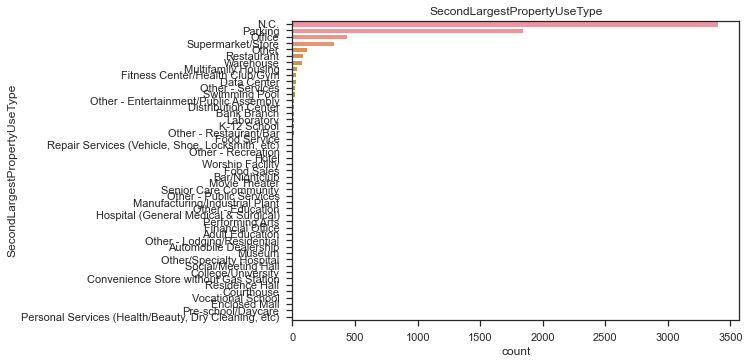

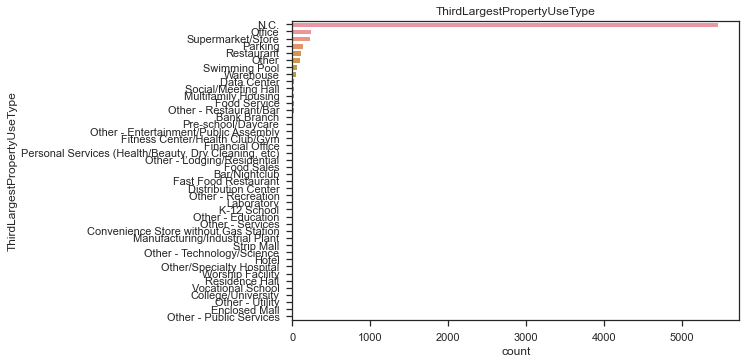

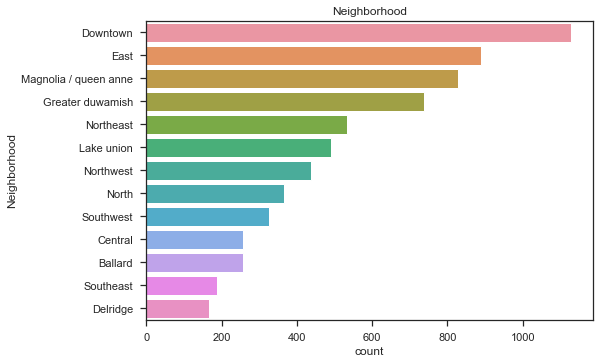

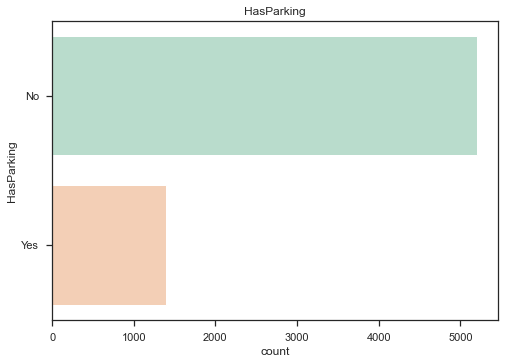

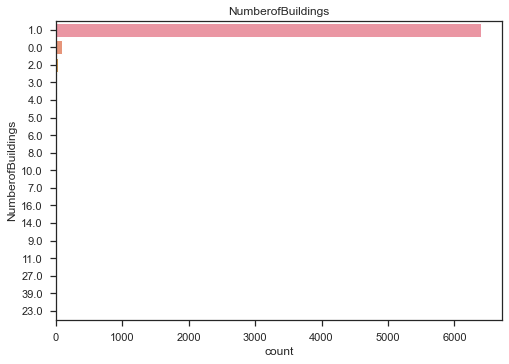

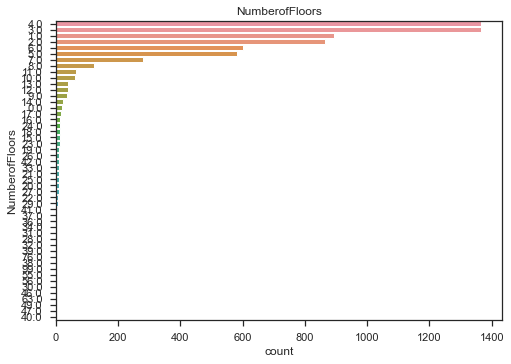

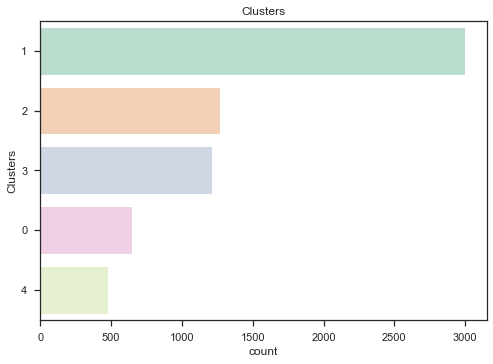

In [46]:
for cols in cat_var:
    sns.countplot(y=cols, data=df, order=df[cols].value_counts().index)
    plt.title(cols)
    plt.show()

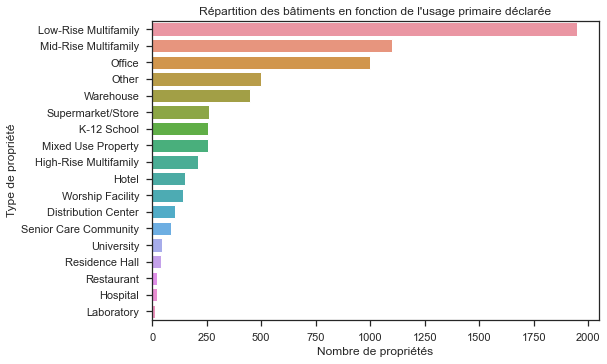

In [47]:
sns.countplot(y="PrimaryPropertyType", data=df, order=df["PrimaryPropertyType"].value_counts().index)
plt.title("Répartition des bâtiments en fonction de l'usage primaire déclarée")
plt.ylabel("Type de propriété")
plt.xlabel("Nombre de propriétés")
plt.savefig("illustrations/Graphiques/type_propriete.png")
plt.show()

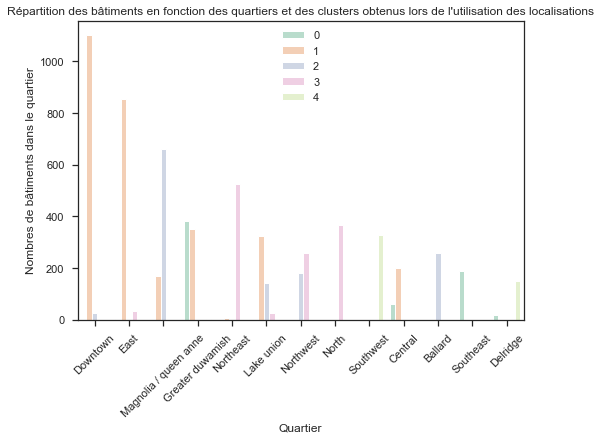

In [48]:
sns.countplot(x="Neighborhood", hue="Clusters", data=df, order=df["Neighborhood"].value_counts().index)
plt.ylabel("Nombres de bâtiments dans le quartier")
plt.xlabel("Quartier")
plt.xticks(rotation=45)
plt.title("Répartition des bâtiments en fonction des quartiers et des clusters obtenus lors de l'utilisation des localisations")
plt.savefig("illustrations/Graphiques/Clusters_quartiers.png")
plt.legend()
plt.show()

- Distribution des variables quantitatives

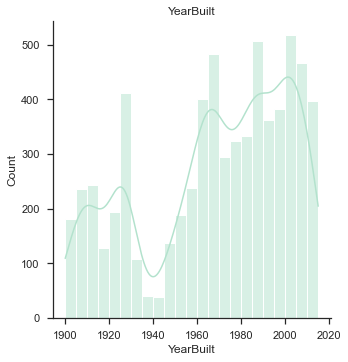

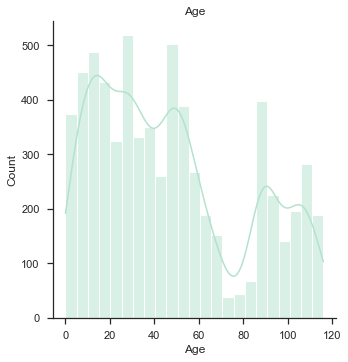

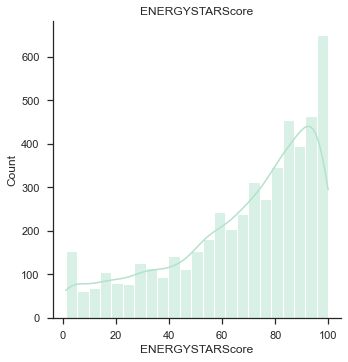

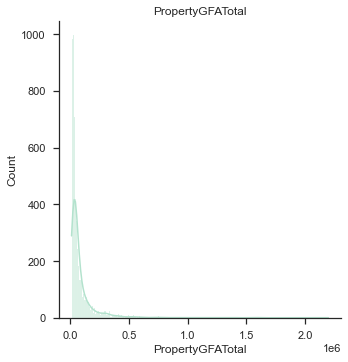

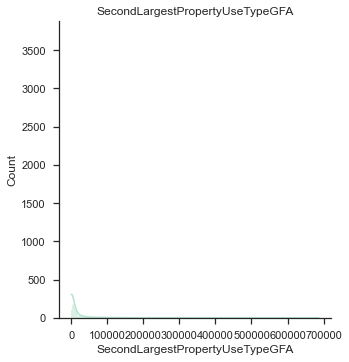

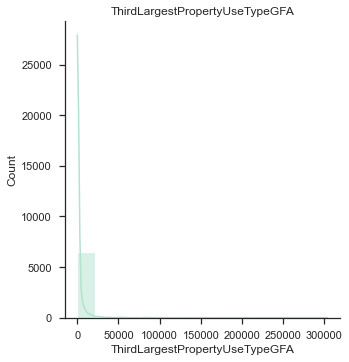

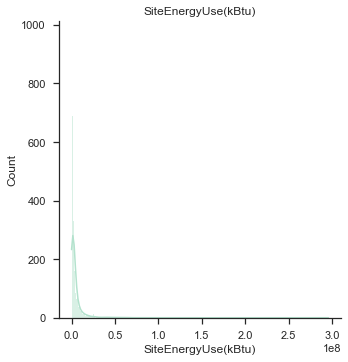

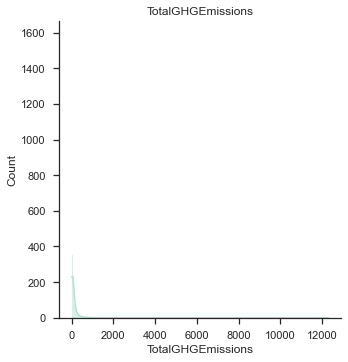

In [49]:
for cols in num_var:
    sns.displot(x=cols, data=df, kde=True)
    plt.title(cols)
    plt.show()

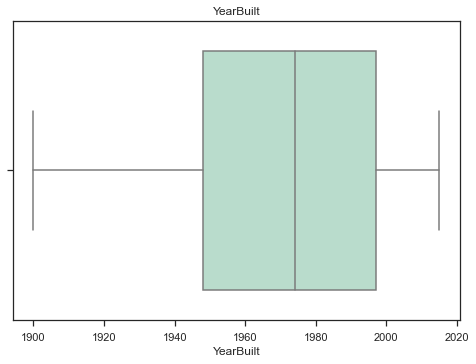

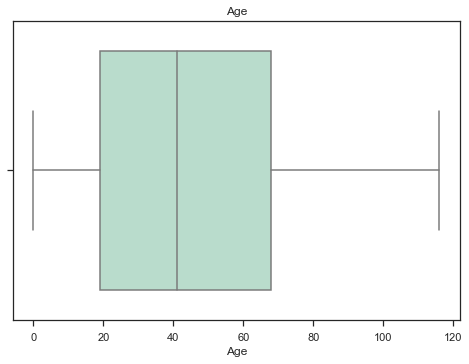

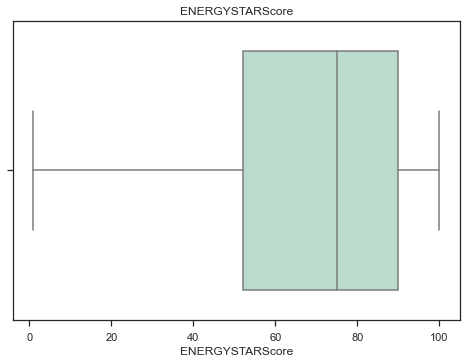

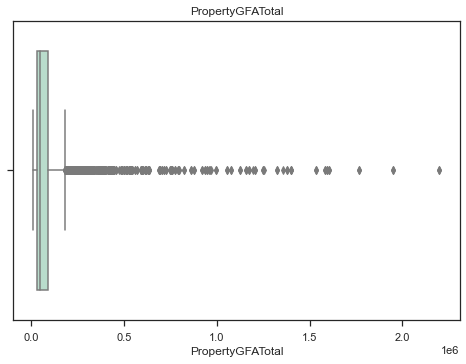

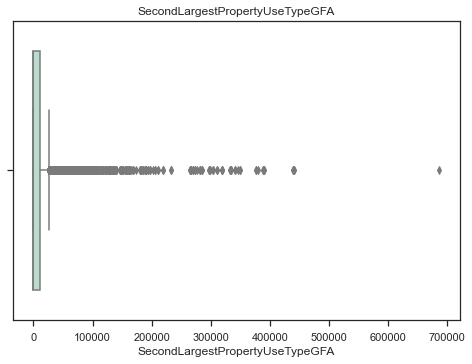

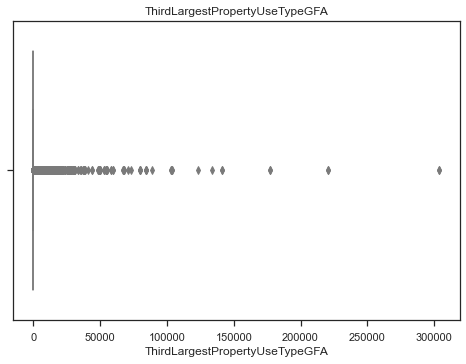

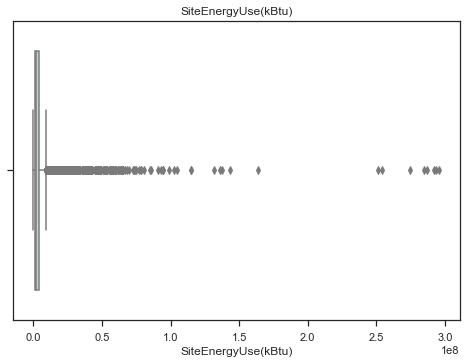

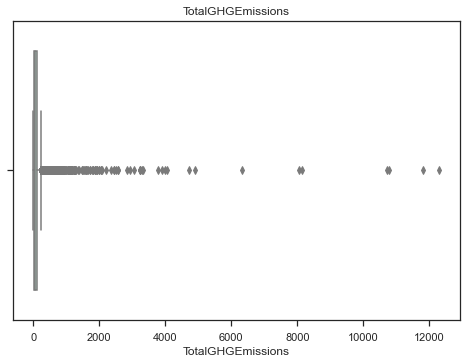

In [50]:
for cols in num_var:
    sns.boxplot(x=cols, data=df)
    plt.title(cols)
    plt.show()

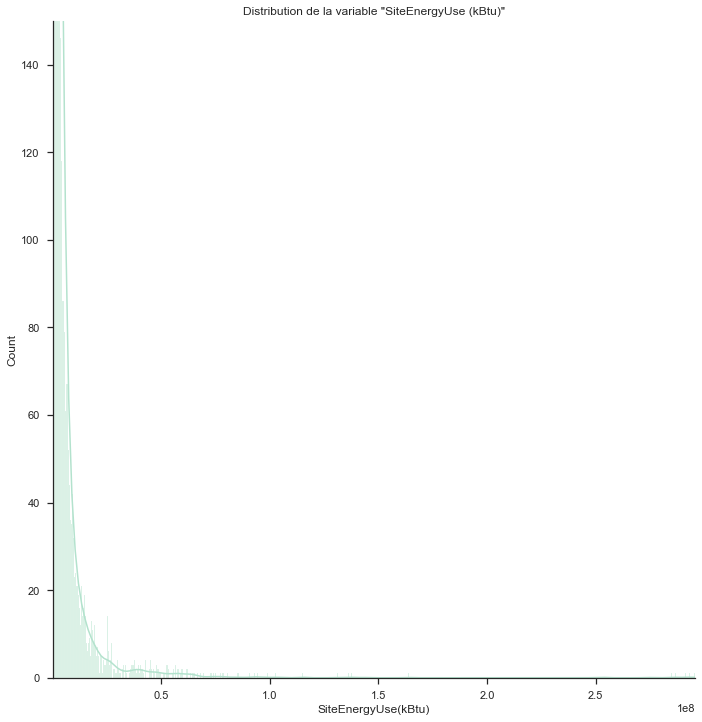

In [51]:
sns.displot(x="SiteEnergyUse(kBtu)", data=df, kde=True, height=10)
plt.xlim(df["SiteEnergyUse(kBtu)"].min(), df["SiteEnergyUse(kBtu)"].max())
plt.ylim(0, 150)
plt.title("Distribution de la variable \"SiteEnergyUse (kBtu)\"")
plt.savefig("illustrations/Graphiques/SiteEnergyUse(kBtu).png")
plt.show();

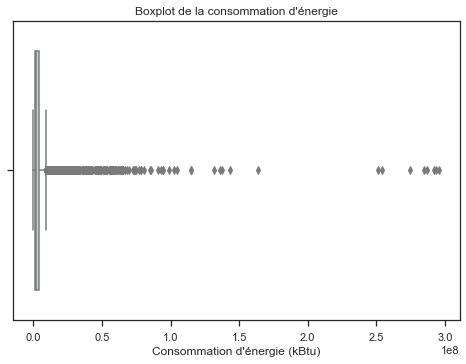

In [52]:
sns.boxplot(x="SiteEnergyUse(kBtu)", data=df)
plt.title("Boxplot de la consommation d'énergie")
plt.xlabel("Consommation d'énergie (kBtu)")
plt.savefig("illustrations/Graphiques/boxplot_energy.png")
plt.show()

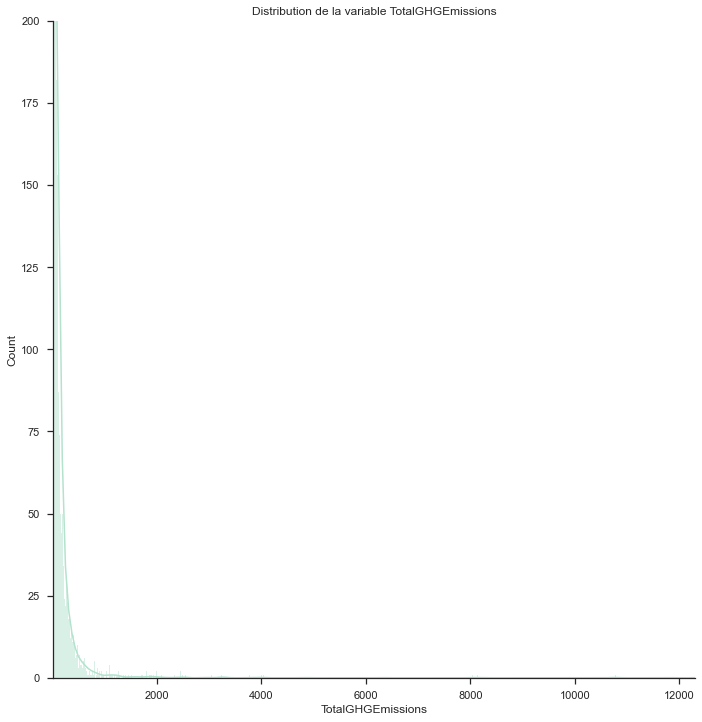

In [53]:
sns.displot(x="TotalGHGEmissions", data=df, kde=True, height=10)
plt.xlim(df["TotalGHGEmissions"].min(), df["TotalGHGEmissions"].max())
plt.ylim(0, 200)
plt.title("Distribution de la variable TotalGHGEmissions")
plt.savefig("illustrations/Graphiques/CO2_emissions.png")
plt.show()

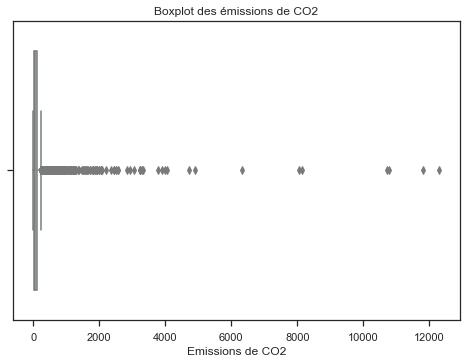

In [54]:
sns.boxplot(x="TotalGHGEmissions", data=df)
plt.title("Boxplot des émissions de CO2")
plt.xlabel("Emissions de CO2")
plt.savefig("illustrations/Graphiques/boxplot_co2.png")
plt.show()

In [55]:
pg.normality(df,method="normaltest")

,W,pval,normal
YearBuilt,1087.480638,7.187532e-237,False
NumberofBuildings,15766.899972,0.000000e+00,False
NumberofFloors,7583.316752,0.000000e+00,False
PropertyGFATotal,7555.123328,0.000000e+00,False
SecondLargestPropertyUseTypeGFA,7741.906701,0.000000e+00,False
ThirdLargestPropertyUseTypeGFA,12830.874566,0.000000e+00,False
ENERGYSTARScore,487.580023,1.328444e-106,False
SiteEnergyUse(kBtu),11500.894408,0.000000e+00,False
TotalGHGEmissions,13740.535006,0.000000e+00,False
Latitude,29.787145,3.402544e-07,False


In [56]:
pg.homoscedasticity(df, method="levene")

,W,pval,equal_var
levene,NaN,NaN,False


Nos données ne semblent pas suivre une loi normale et l'homogénéité des variances n'est pas respectée. 

In [57]:
df.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,Age,degreeDaysH,Clusters
count,6607.000000,6607.000000,6599.000000,6.607000e+03,6607.000000,6607.000000,5045.000000,6.607000e+03,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,1968.282125,1.054942,4.719654,9.155962e+04,13454.536143,1890.007023,67.857483,5.011118e+06,110.629154,47.623936,-122.334870,47.223399,4049.486151,1.677463
std,32.955281,0.862045,5.505094,1.496993e+05,38215.704020,10360.287874,27.037842,1.361684e+07,409.286255,0.047769,0.027156,32.954487,44.000644,1.103052
min,1900.000000,0.000000,0.000000,1.128500e+04,-1.000000,-1.000000,1.000000,4.429350e+04,0.310000,47.499170,-122.414250,0.000000,4005.000000,0.000000
25%,1948.000000,1.000000,2.000000,2.846850e+04,-1.000000,-1.000000,52.000000,9.304039e+05,9.560000,47.599825,-122.350705,19.000000,4005.000000,1.000000
50%,1974.000000,1.000000,4.000000,4.401600e+04,-1.000000,-1.000000,75.000000,1.807738e+06,33.410000,47.618400,-122.332630,41.000000,4093.000000,1.000000
75%,1997.000000,1.000000,5.000000,9.000000e+04,10244.000000,-1.000000,90.000000,4.170845e+06,91.610000,47.657110,-122.319755,68.000000,4093.000000,3.000000
max,2015.000000,39.000000,99.000000,2.200000e+06,686750.000000,303910.000000,100.000000,2.958126e+08,12307.160000,47.733870,-122.220966,116.000000,4093.000000,4.000000


In [58]:
df.groupby("PrimaryPropertyType")["TotalGHGEmissions"].mean().sort_values(ascending=False)

PrimaryPropertyType
Hospital                 4868.863000
Laboratory                827.916364
University                473.922391
Hotel                     414.582733
Senior Care Community     269.331591
High-Rise Multifamily     229.193077
Other                     212.459800
Restaurant                172.655238
Mixed Use Property        144.055117
Supermarket/Store         128.713511
Office                    112.254156
Residence Hall             97.131842
K-12 School                91.969302
Mid-Rise Multifamily       62.647259
Distribution Center        50.105472
Worship Facility           42.007535
Warehouse                  38.926489
Low-Rise Multifamily       26.164413
Name: TotalGHGEmissions, dtype: float64

In [59]:
df.groupby("PrimaryPropertyType")["SiteEnergyUse(kBtu)"].mean().sort_values(ascending=False)

PrimaryPropertyType
Hospital                 1.360147e+08
Laboratory               2.620197e+07
University               1.763785e+07
Hotel                    1.259181e+07
Other                    9.678969e+06
High-Rise Multifamily    8.853671e+06
Senior Care Community    8.834183e+06
Office                   8.399204e+06
Mixed Use Property       7.403344e+06
Supermarket/Store        6.350544e+06
Restaurant               4.944760e+06
Residence Hall           3.448770e+06
K-12 School              3.064561e+06
Distribution Center      2.801173e+06
Mid-Rise Multifamily     2.778534e+06
Warehouse                1.835270e+06
Low-Rise Multifamily     1.331807e+06
Worship Facility         1.179291e+06
Name: SiteEnergyUse(kBtu), dtype: float64

Les hôpitaux sont les bâtiments non-résidentiels qui consomment le plus d'énergie et qui émettent le plus de CO2. 

In [60]:
df.groupby("Clusters")["TotalGHGEmissions"].mean().sort_values(ascending=False)

Clusters
1    157.267308
3     87.878357
2     66.443989
0     64.241325
4     55.488434
Name: TotalGHGEmissions, dtype: float64

In [61]:
df.groupby("Clusters")["SiteEnergyUse(kBtu)"].mean().sort_values(ascending=False)

Clusters
1    7.129250e+06
3    3.838368e+06
0    3.116814e+06
2    3.025450e+06
4    2.515971e+06
Name: SiteEnergyUse(kBtu), dtype: float64

In [62]:
df.loc[df["PrimaryPropertyType"] == "Hospital"]

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,Age,degreeDaysH,HasParking,Clusters
365,Hospital,Ballard,1954,1.0,5.0,285333,Parking,148865.0,N.C.,-1.0,28.0,6.336252e+07,1874.42,47.667370,-122.379560,61,4005,No,2
367,Hospital,Ballard,1954,4.0,5.0,285333,Parking,148865.0,N.C.,-1.0,14.0,6.809073e+07,1990.50,47.667370,-122.379560,62,4093,No,2
465,Hospital,Northeast,1953,1.0,10.0,879000,N.C.,-1.0,N.C.,-1.0,13.0,2.511918e+08,8046.70,47.662310,-122.281460,62,4005,No,3
467,Hospital,Northeast,1953,6.0,10.0,879000,N.C.,-1.0,N.C.,-1.0,10.0,2.538325e+08,8145.52,47.662310,-122.281460,63,4093,No,3
628,Hospital,Central,1990,1.0,5.0,597519,Parking,48607.0,N.C.,-1.0,45.0,1.376357e+08,4725.43,47.607050,-122.309660,25,4005,No,1
630,Hospital,Central,1990,6.0,5.0,597519,Parking,48607.0,N.C.,-1.0,34.0,1.434230e+08,4906.33,47.607050,-122.309660,26,4093,No,1
640,Hospital,East,2000,1.0,8.0,1158691,Parking,387651.0,N.C.,-1.0,30.0,2.958126e+08,10780.64,47.603990,-122.323770,15,4005,No,1
642,Hospital,East,2000,9.0,8.0,1158691,Parking,387651.0,N.C.,-1.0,29.0,2.930908e+08,10734.57,47.603990,-122.323770,16,4093,No,1
1373,Hospital,Lake union,2000,1.0,7.0,309535,N.C.,-1.0,N.C.,-1.0,17.0,4.651802e+07,1185.15,47.626670,-122.329650,15,4005,Yes,1
1375,Hospital,Lake union,2000,1.0,7.0,351530,N.C.,-1.0,N.C.,-1.0,23.0,4.270962e+07,1032.63,47.626670,-122.329650,16,4093,Yes,1


Les bâtiments présents dans le cluster 1 sont ceux qui utilisent le plus d'énergie et qui, par conséquent, rejettent plus de CO2. 

### 2.3) Analyses bivariées <a class="anchor" id="section_2_3"></a>

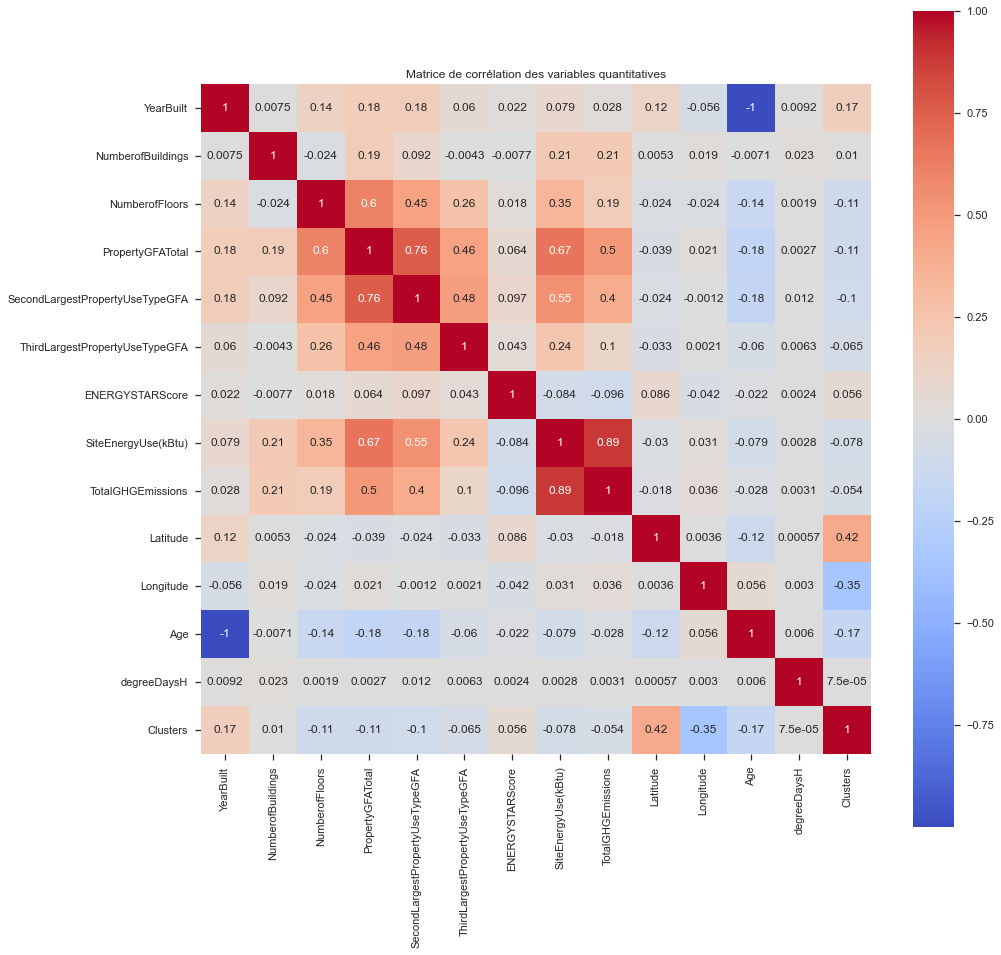

In [63]:
matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(matrix, square=True, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

On observe une forte corrélation entre la consommation d'énergie et les émissions de gaz à effets de serre. 

In [64]:
matrix['SiteEnergyUse(kBtu)'].sort_values(ascending=False)

SiteEnergyUse(kBtu)                1.000000
TotalGHGEmissions                  0.887828
PropertyGFATotal                   0.669982
SecondLargestPropertyUseTypeGFA    0.545365
NumberofFloors                     0.348213
ThirdLargestPropertyUseTypeGFA     0.241323
NumberofBuildings                  0.214616
YearBuilt                          0.078835
Longitude                          0.030674
degreeDaysH                        0.002842
Latitude                          -0.029755
Clusters                          -0.077708
Age                               -0.078794
ENERGYSTARScore                   -0.083860
Name: SiteEnergyUse(kBtu), dtype: float64

La superficie des propriétés et le nombre de bâtiments sont très fortement corrélés avec la consommation d'énergie. 

In [65]:
matrix['TotalGHGEmissions'].sort_values(ascending=False)

TotalGHGEmissions                  1.000000
SiteEnergyUse(kBtu)                0.887828
PropertyGFATotal                   0.504632
SecondLargestPropertyUseTypeGFA    0.400829
NumberofBuildings                  0.209839
NumberofFloors                     0.190894
ThirdLargestPropertyUseTypeGFA     0.104701
Longitude                          0.035912
YearBuilt                          0.027700
degreeDaysH                        0.003099
Latitude                          -0.018240
Age                               -0.027653
Clusters                          -0.053706
ENERGYSTARScore                   -0.095844
Name: TotalGHGEmissions, dtype: float64

La superficie des propriétés et le nombre de bâtiments sont moyennement corrélés avec la consommation d'énergie. 

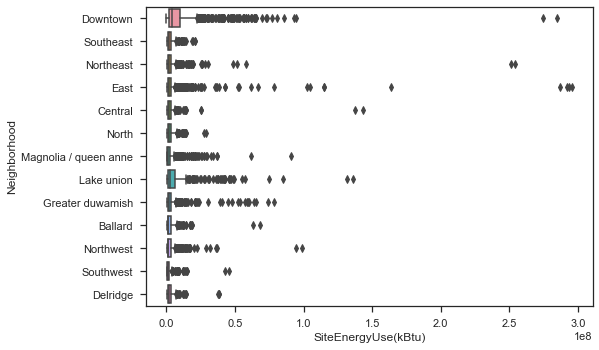

In [66]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="Neighborhood", data=df)
plt.show()

In [67]:
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="Neighborhood")

,Source,ddof1,ddof2,F,p-unc,np2
0,Neighborhood,12,6594,17.68279,4.486374e-38,0.031177


Le quartier d'appartenance d'un logement n'a pas d'effet sur la consommation d'énergie. 

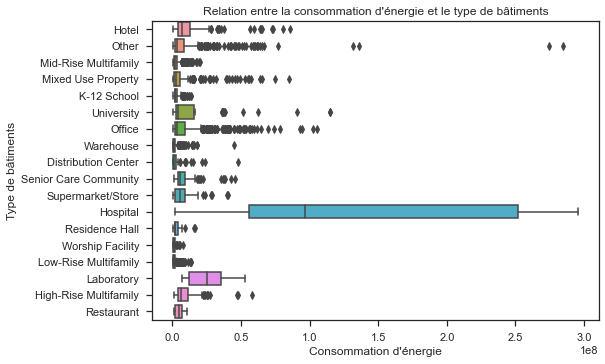

In [68]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="PrimaryPropertyType", data=df)
plt.xlabel("Consommation d'énergie")
plt.ylabel("Type de bâtiments")
plt.title("Relation entre la consommation d'énergie et le type de bâtiments")
plt.savefig("illustrations/Graphiques/bâtiment_vs_energie.png")
plt.show()

In [69]:
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="PrimaryPropertyType")

,Source,ddof1,ddof2,F,p-unc,np2
0,PrimaryPropertyType,17,6589,211.879962,0.0,0.353447


Le type de bâtiment va avoir un large effet du type de propriété sur la consommation d'énergie.

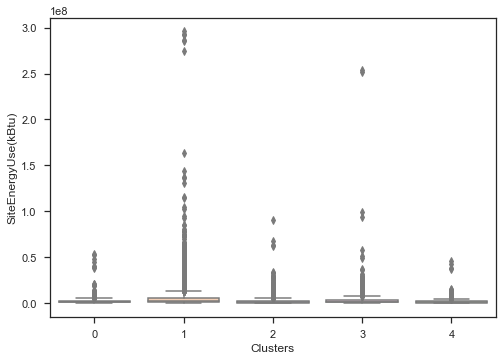

In [70]:
sns.boxplot(y="SiteEnergyUse(kBtu)", x="Clusters", data=df)
plt.show()

In [71]:
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="Clusters")

,Source,ddof1,ddof2,F,p-unc,np2
0,Clusters,4,6602,35.002394,5.721379e-29,0.020767


Il ne semble pas avoir de lien entre les clusters et la consommation d'énergie. 

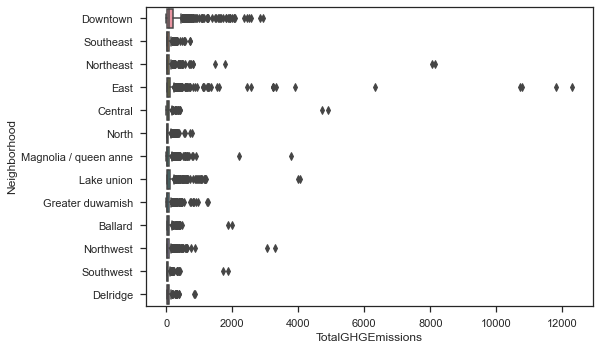

In [72]:
sns.boxplot(x="TotalGHGEmissions", y="Neighborhood", data=df)
plt.show()

In [73]:
pg.anova(data=df, dv="TotalGHGEmissions", between="Neighborhood")

,Source,ddof1,ddof2,F,p-unc,np2
0,Neighborhood,12,6594,8.443615,4.192153e-16,0.015133


Il y a un effet modéré de la localisation d'un bâtiment dans un quartier sur les émissions de CO2. 

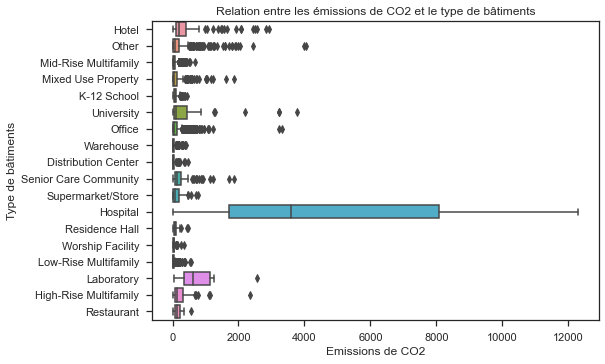

In [74]:
sns.boxplot(x="TotalGHGEmissions", y="PrimaryPropertyType", data=df)
plt.xlabel("Emissions de CO2")
plt.ylabel("Type de bâtiments")
plt.title("Relation entre les émissions de CO2 et le type de bâtiments")
plt.savefig("illustrations/Graphiques/bâtiment_vs_co2.png")
plt.show()

In [75]:
pg.anova(data=df, dv="TotalGHGEmissions", between="PrimaryPropertyType")

,Source,ddof1,ddof2,F,p-unc,np2
0,PrimaryPropertyType,17,6589,330.252817,0.0,0.460064


Il y a un effet important du type de bâtiments sur les émissions de CO2. 

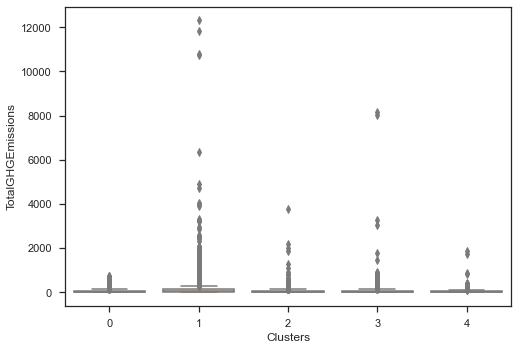

In [76]:
sns.boxplot(y="TotalGHGEmissions", x="Clusters", data=df)
plt.show()

In [77]:
pg.anova(data=df, dv="TotalGHGEmissions", between="Clusters")

,Source,ddof1,ddof2,F,p-unc,np2
0,Clusters,4,6602,18.827889,2.095526e-15,0.011279


Il n'y a pas d'effet du cluster sur les émissions de CO2. 

## 3) Références bibliographiques et définitions <a class="anchor" id="chapter3"></a>

**Définitions**
- **SiteEnergyUse :** The annual amount of energy consumed by the property from all sources of energy.
- **GHGEmissions :** The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

*Source* : [Ville de Seattle](!https://data.seattle.gov/dataset/2015-Building-Energy-Benchmarking/h7rm-fz6m)

**Sources :**

- [Différence entre source et site](!https://www.energystar.gov/buildings/benchmark/understand_metrics/source_site_difference)
- [Définition de l'EUI](!https://www.energystar.gov/buildings/benchmark/understand_metrics/what_eui)
- [Energy Star Score](!https://www.energystar.gov/buildings/benchmark/analyze_benchmarking_results)
- [Définition des types de bâtiments](!https://portfoliomanager.energystar.gov/pm/glossary)